 # Predicting heart disease using machine learning

this notbook looks into using various python based machine learning and data science libraries in an attempt 
to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

going to cover 

1. problem definition
2. data
3. evaluation
4. features
5. modelling
6. experimentation

## preparing the tools 

going to use pandas , numpy , matplotlib for data analysis and manipulation.



In [1]:
# import all the tools we need

# regular eda(exploration data analysis) and plotting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#we want our plots to appear inside the notebook
%matplotlib inline 

#models from scikit learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

# load data

In [2]:
df=pd.read_csv("heart-diseasenew.csv")
df.shape

(303, 14)

# data exploration (exploratory data analysis or EDA)

The goals here is to find out more about the data and become subject matter export on the data:
1. what questions are you trying to solve
2. what kind of data do we have and how do we treat different types
3. whats missing from data and how to deal with it?
4. where are the outliers and why should you care about them?
5. how can you add change or remove features to get more of your data?


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail(
)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# counting the single column
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

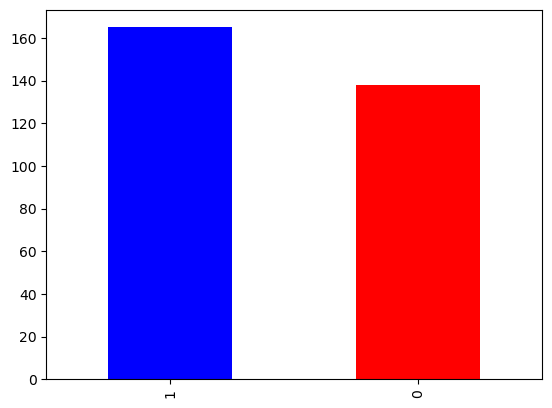

In [6]:
#plot the target to easily understand
df["target"].value_counts().plot(kind="bar",color=["blue","red"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#to check the missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


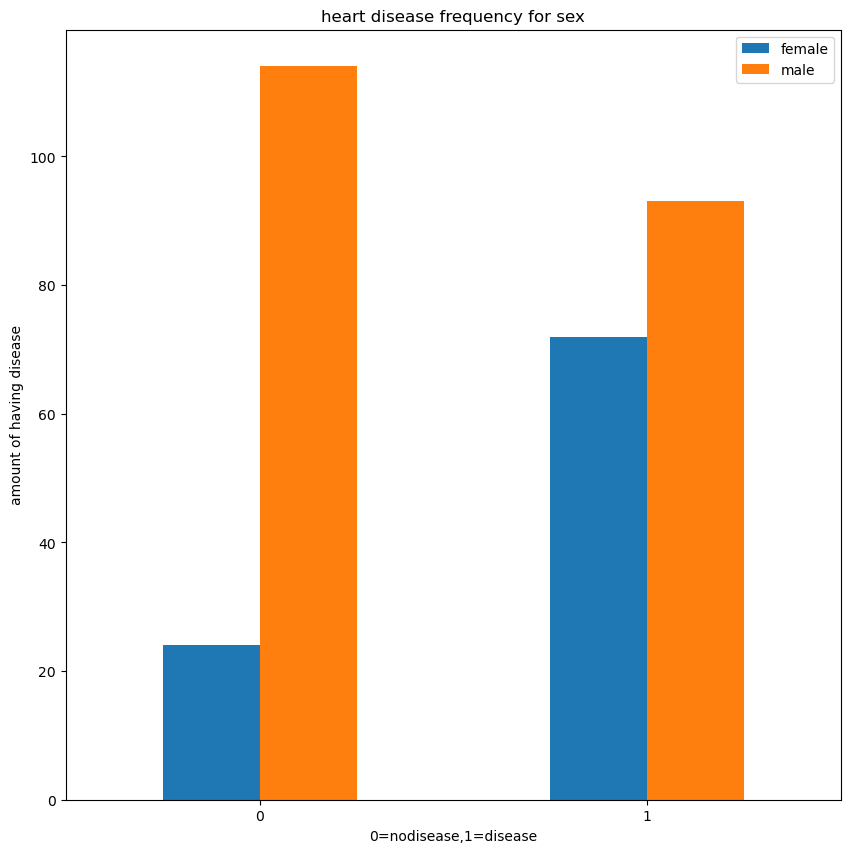

In [12]:
#create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,10))
plt.title("heart disease frequency for sex")
plt.xlabel("0=nodisease,1=disease")
plt.ylabel("amount of having disease")
plt.legend(["female","male"]);
plt.xticks(rotation=0);

In [13]:
# doing the other example of compare the target and thal
pd.crosstab(df.target,df.thal)

thal,0,1,2,3
target,,,,
0,1,12,36,89
1,1,6,130,28


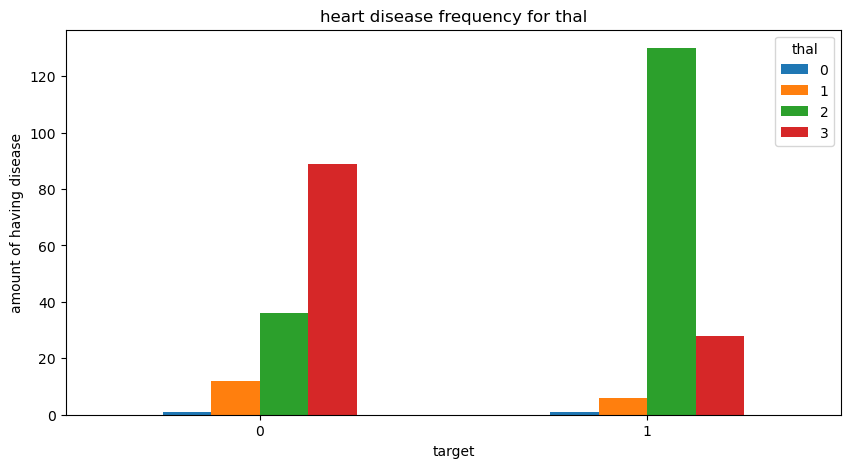

In [14]:
#create the plot for the crosstab
pd.crosstab(df.target,df.thal).plot(kind="bar",figsize=(10,5))
plt.title("heart disease frequency for thal")
#plt.xlabel("0=no disease,1=disease")
plt.ylabel("amount of having disease")
#plt.legend(["female","male"]);
plt.xticks(rotation=0);

### age vs max heart raet for heart disease

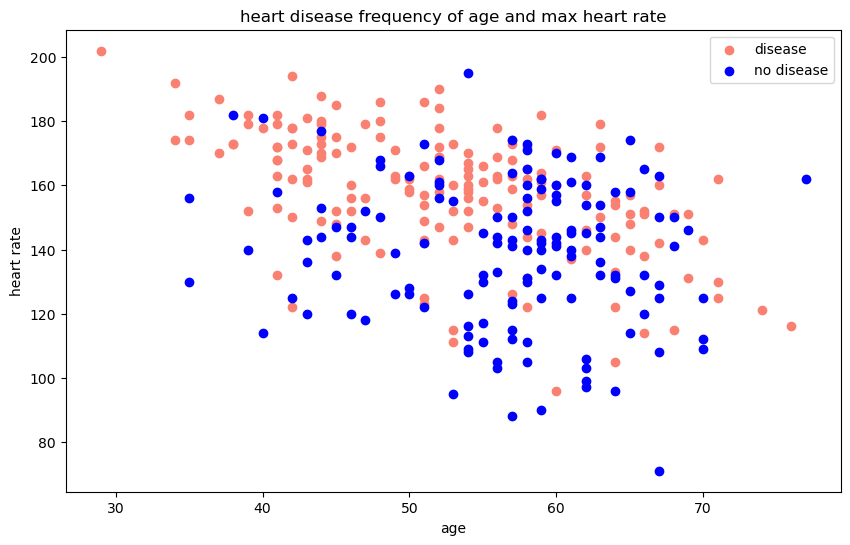

In [15]:
#create the another figure
plt.figure(figsize=(10,6))

#plt.scatter with positive example
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")
#plot the scatter with negative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="blue")
#add some helpful info
plt.title("heart disease frequency of age and max heart rate")
plt.xlabel("age")
plt.ylabel("heart rate")
plt.legend(["disease","no disease"]);

<AxesSubplot: ylabel='Frequency'>

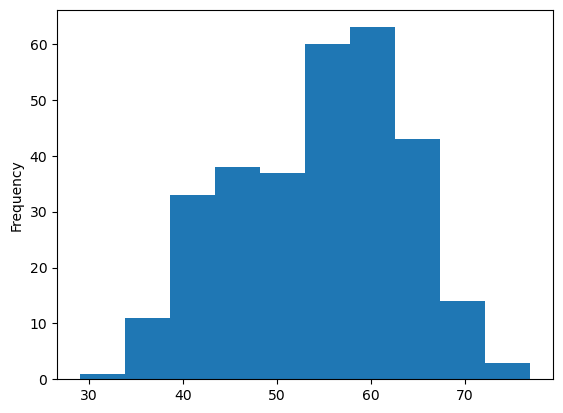

In [16]:
# check the distribution of the age column with a histogram
df.age.plot.hist()

## heart disease frequency per chest pain type


In [17]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [18]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


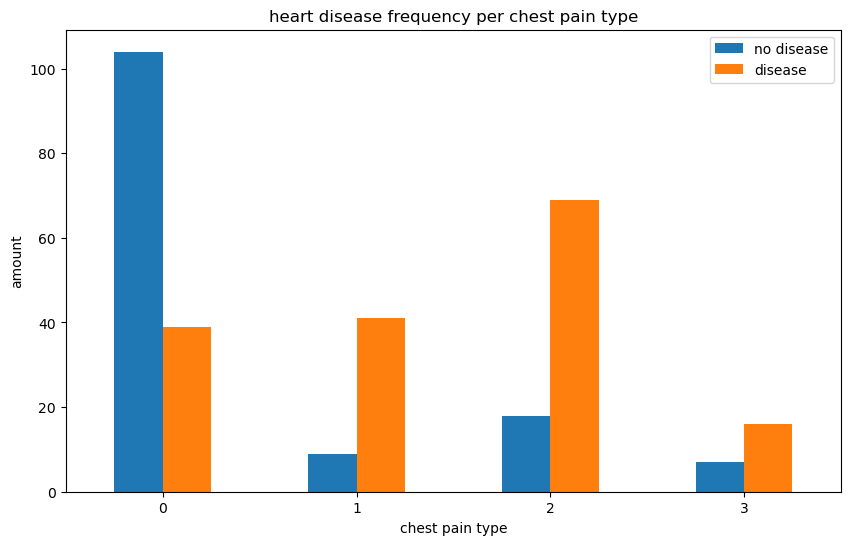

In [19]:
#make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6))
plt.title("heart disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["no disease","disease"])
plt.xticks(rotation=0);

In [20]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [1]:
# lets make our correlation matrix a litter prettier

corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="crest");


NameError: name 'df' is not defined

## the above part is ended with problem definition,data,evaluation,features

## and its time time for machine learning

# 5. modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
#split the data into x and y

x=df.drop("target",axis=1)

y=df["target"]


In [24]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
# split the data into train and test

np.random.seed(42)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### ist time to build the machine model
### making the model and find the suitable model and use the patterns
### use the model to find out the model

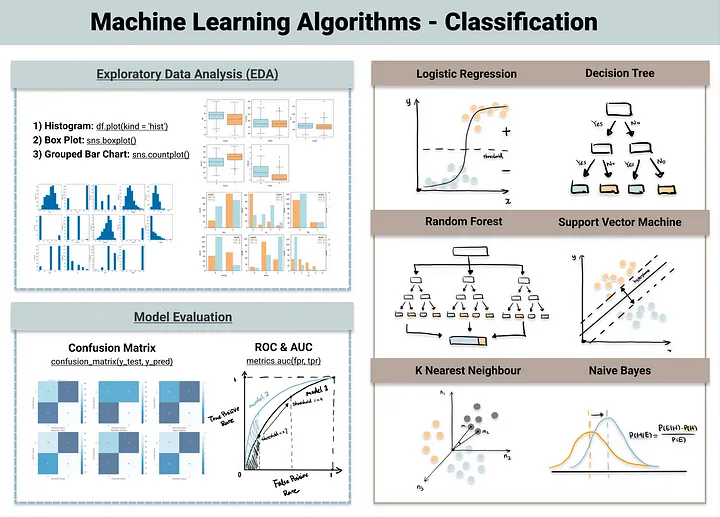

In [27]:
#importing for the reference
from IPython import display

display.Image('../images/class_model.png')

#  now we are going to try the 3 different machine learning model:

1. logistic regression.
2. k-nearest neighbours classifier
3. random forest classifier

In [28]:
#put a model in a dictionary (means doing all needed models in a easy way by using python)

models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

#create a function to fit and score models

def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    fits and evaluate given machine learning models.
    model: a dict of different scikit learn machine learning models.
    x_train,x_test,y_train,y_test
    
    """
    
    
    #set random seed
    np.random.seed(42)
    
    #make a dictionary to keep model scores
    model_scores={}
    #loop through models
    for name,model in models.items():
        #fit the model to the data
        model.fit(x_train,y_train)
        #Evaluate the model and append its score to model_score
        model_scores[name]=model.score(x_test,y_test)
    return model_scores  

In [29]:
#sending the values to the methods
model_scores=fit_and_score(models=models,
                           x_train=x_train,
                           x_test=x_test,
                           y_train=y_train,
                           y_test=y_test)                           
                           
model_scores

/Users/macbookair/Desktop/sample_project/heart-disease-project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### model comparision

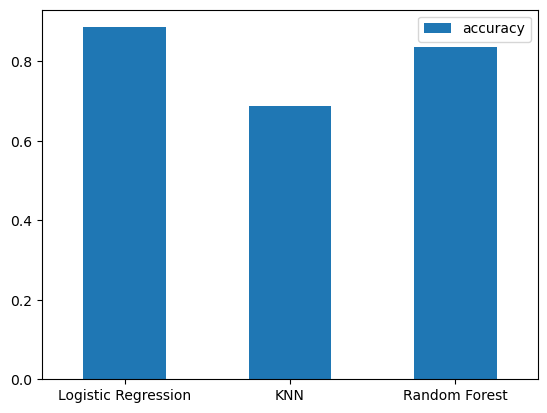

In [30]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0);

# lets look up the following
* hyperparameter tunning
* feature importance
* confusion matrix
* cross validation
* precision
* recall
* f1 score
* classification report
* roc curve
* area under the curve(auc)

## hyperparameter tunning (by hand)

In [31]:
# lets tune KNeighborsClassifier()

train_scores=[]
test_scores=[]

#create a list of different values for n_neighbours
neighbors=range(1,21)

#setup KNN instances
knn=KNeighborsClassifier()

#loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    
    #fit the algorithm
    knn.fit(x_train,y_train)
    
    #update the training score list
    train_scores.append(knn.score(x_train,y_train))
    
    #update the test score list
    test_scores.append(knn.score(x_test,y_test))

In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximun KNN score on the test data:75.41%


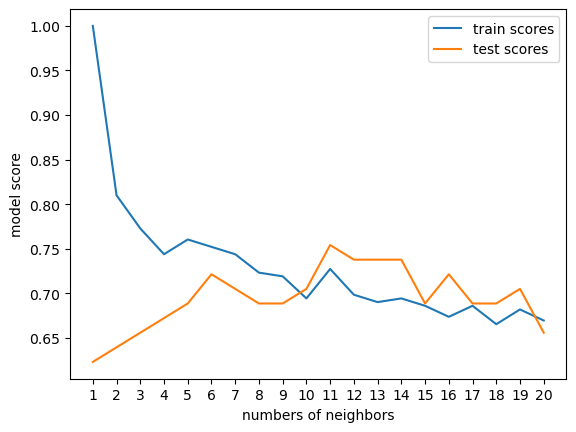

In [34]:
plt.plot(neighbors,train_scores,label="train scores")
plt.plot(neighbors,test_scores,label="test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("numbers of neighbors")
plt.ylabel("model score")
plt.legend()

print(f"maximun KNN score on the test data:{max(test_scores)*100:.2f}%")


 ### hyperparameter tunning (by hand) is slightly difficult for all parameters in the models

## hyperparameters tuning with ramdomizedsearchcv


# we are going to tune :
* logisticregression()
* randomforestclassifier()


# using and tuning the logisticregression() and randomforestclassifier()

In [35]:
#create a hyperparameters grid for logisticregression()

log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

#create a hyperparameters grid for randomforestclassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

#### now we got hyperparameters grids setup for each of our models let tune them using randomizedsearchcv

In [36]:
# tune logistic regression

np.random.seed(42)

#setup random hyperparameters search for logisticregression

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                            verbose=True)

#fit random hyperparameters search model for logisticregression

rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [39]:
##tuning the logisticregression() is ended

## now do the same for randomforestclassifier()

In [40]:
np.random.seed(42)

#setup random hyperparameters search for randomforestclassifier

rs_log_reg=RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                            verbose=True)

#fit random hyperparameters search model for randomforestclassifier()

rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
#find the best hyperparameters
rs_log_reg.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [42]:
#evaluate the randomized search randomforestclassifier() model

rs_log_reg.score(x_test,y_test)

0.8688524590163934

In [43]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

1. by hand
2. randomizedsearchcv
3. gridsearchcv

# Hyperparameters tuning with gridsearchcv

we are going to improve the logisticregression model using the gridsearchcv

In [44]:
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

#setup grid hyperparameters search for logisticregression

gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                       verbose=True)

#fit the hyperparameters search model
gs_log_reg.fit(x_train,y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [45]:
#check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
#evaluate the grid search logisticregression model
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## evaluate our tuned machine larning classifier beyound accuracy

* roc curve and auc score
*confusion matrix
* classification report
* precision
* recall
* f1-score

and it would be great if cross validation was used where possible.

to make comparisions and evaluate our trained first we need to make predictions

In [47]:
# make prediction with tuned model:

y_preds=gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

/Users/macbookair/Desktop/sample_project/heart-disease-project/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


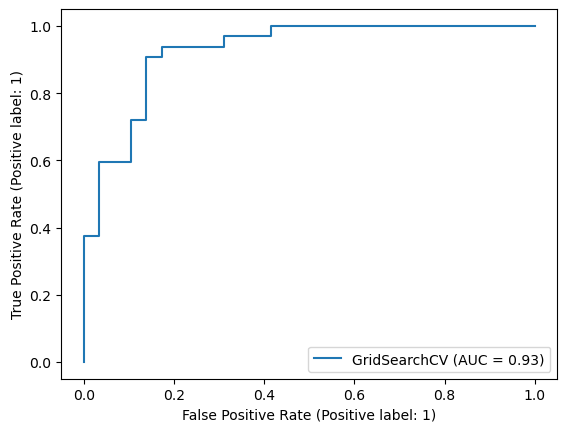

In [48]:
#plot roc curve and calculate and calculate auc metric
plot_roc_curve(gs_log_reg,x_test,y_test)

In [49]:
# confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


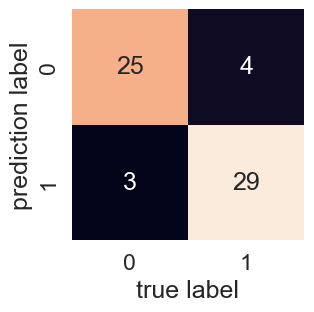

In [50]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    plots a nice looking confusion matrix using seaborn heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("true label")
    plt.ylabel("prediction label")
    
plot_conf_mat(y_test,y_preds)

now we got a roc curve an aue metrics and  a confusion matrix lets get a classification reportas well as cross validated precision,recall and f1 score

In [51]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## calculate evaluation metrics using cross-validation

we are going to calculate accuracy,precision,recaall and f1 score of our model using cross_validation and to do so we will be using cross_val_score()

In [55]:
# check the hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
# create a new classifier with best parameters

clf=LogisticRegression(C=0.20433597178569418,solver='liblinear')

In [62]:
# cross-validation accuracy
cv_acc=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [63]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [64]:
# cross-validation precision

cv_precision=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [65]:
# cross-validation recall
cv_recall=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [68]:
# cross-validation f1-SCORE

cv_f1=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

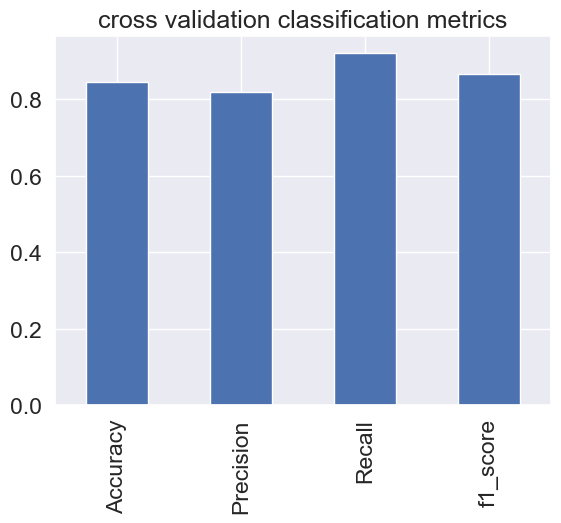

In [76]:
#visualize cross-validation metrics

cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "f1_score":cv_f1},
                         index=[0])


cv_metrics.T.plot.bar(title="cross validation classification metrics",
                      legend=False);
    


### feature importance

feature importance is another as asking, which features contributed most to the outcomes of the model and how did they contribute?
 
finding feature importance is different for each machine learning model.

lets find the feature importance for our LogisticRegression model

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
#fit an instance of LogisticRegression

clf=LogisticRegression(C= 0.20433597178569418, solver='liblinear')
clf.fit(x_train,y_train);


In [82]:
#check coef_
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [83]:
# match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

<AxesSubplot: title={'center': 'feature importance'}>

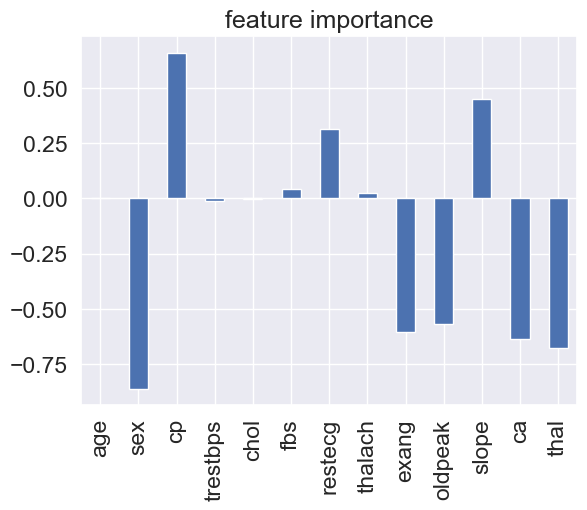

In [84]:
#visualize feature importance

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="feature importance",legend=False)

In [85]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [86]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# Experimentation

IF you haven't hit your evaluation metrics yet.. as yourself ...

* could you collect more data
* could you try a better model ? like catboost or xgboost ?
* could you improve the current models ? (beyond what we've done so far)
* if you model is good enough export it and share with others.

# Export the model

In [88]:
## 1. with python's 'pickle' module

import pickle

#save an extisting model to file
pickle.dump(clf, open("heart_disease_project1.pk", "wb"))

In [91]:
# to use a loaded model use the below code

#load a saved model

loaded_pickle_model=pickle.load(open("heart_disease_project1.pk","rb"))